# Introduction

In this lab, we get some initial experience with using some of the main python tools for this course, including
Numpy, Matplotlib and Pandas. We also load some datasets, compute some basic statistics on them and plot
them.

The lab assumes that you are familiar with Python. Please complete ``Week 01 lab: Introduction to python`` before attempting this lab. 

The lab can be executed on either your own machine (with anaconda installation) or lab computer. 
- Please refer canvas for instructions on installing anaconda python and Jupyter Notebook.


## Objective
- Continue to familiarise with Python and Jupyter Notebook
- Load dataset and examine the dataset
- Learn to compute basic statistics to understand the dataset more
- Plot the datasets to visually investigate the dataset

## Dataset

We examine two regression based datasets in this lab. The first one is to do with house prices, some factors
associated with the prices and trying to predict house prices. The second dataset is predicting the amount of
share bikes hired every day in Washington D.C., USA, based on time of the year, day of the week and weather
factors. These datasets are available in 'housing.data.csv' and 'bikeShareDay.csv' in the code repository. 

First, ensure the two data files are located within the Jupyter workspace. 
- If you are on the local machine copy the two data data directories ('BostonHousingPrice','Bike-Sharing-Dataset') to your current folder.

# Load dataset to Python Notebook

Next we examine how to load these into Python and Jupyter notebooks. We will first analyse the House prices dataset, then you’ll repeat the process to analyse the bike hire dataset.

First we need to import a few packages that will be used for our data loading and analysis. In python notebook you can load packages just before it is called (no need to load them at the start of the program).

Pandas is a great Python package for loading data.  We will use Matplotlib to visualise some of the distributions.  Numpy is a numeric library that has many useful matrices and mathematical functionality.

In [26]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [28]:
import numpy as np

In [29]:
housedata = pd.read_csv("housing.data.csv", delimiter="\s+")

Replace the filename with the relative or absolute path to your files.  We strongly encourage you to look up the documentation of the functions we use in the lab, in this case examine [Pandas read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

The `read_csv()` command loads the input file, which is a csv formatted file delimited by tabs, into a **Pandas dataframe** (which can be thought of as a table). A dataframe can store the column names as well as the data.  Examine what has been loaded into the dataframe `housedata`.

In [24]:
print(housedata)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

If you are interested in checking only the first few rows of the dataframe to see if you have read the data in correctly, you can use the head method in dataframe.

In [8]:
housedata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Now we have loaded the data into a data frame and printed it out, next we will compute some very basic statistics. The abbreviated column names:
- CRIM:      per capita crime rate by town
- ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:     proportion of non-retail business acres per town
- CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:       nitric oxides concentration (parts per 10 million)
- RM:        average number of rooms per dwelling
- AGE:       proportion of owner-occupied units built prior to 1940
- DIS:       weighted distances to five Boston employment centres
- RAD:       index of accessibility to radial highways
- TAX:      full-value property-tax rate per USD10,000
- PTRATIO:  pupil-teacher ratio by town
- B:        1000 (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT:    lower status of the population
- MEDV:     Median value of owner-occupied homes in USD1000's


<font color='green'> The target column is **MEDV** and all the other columns are attributes. </font>

Study the variables carefully and understand what they represent before moving to the next section. 

# Exploratory Data Analysis (EDA)

Often the first step in developing a machine learning solution for a given dataset is the EDA. EDA refers to the critical process of performing initial investigations on data so as to:
 - Maximize insight into a data set;
 - Uncover underlying structure;
 - Extract important variables;
 - Detect outliers and anomalies;
 - Test underlying assumptions;
 - Develop parsimonious models; and
 - Determine optimal factor settings.
 
with the help of summary statistics and graphical representations. The particular graphical techniques employed in EDA are often quite simple, consisting of various techniques of:

- Plotting the raw data (such as data traces, histograms, bi-histograms, probability plots, lag plots, block plots, and Youden plots.
- Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.
- Positioning such plots so as to maximize our natural pattern-recognition abilities, such as using multiple plots per page.

> **<span style="font-size:1.5em;">⚠</span> Warning: EDA is a subjective process and will depend on the task & the data you have. There is no globally correct way of doing this.**
> Usually you need to have a good understanding of the task before deciding what EDA techniques to use and continuously refine them based on the observations you make in the initial steps. Since we are still at the beginning of the course, let's explore some commonly used techniques. You will understand the significance of these methods and observations in terms of ML in the next couple of weeks.

Let's first see the shape of the dataframe.

In [9]:
housedata.shape

(506, 14)

<span style="font-size:1.5em;">�</span> What does the above output tell you?

It is also a good practice to know the columns and their corresponding data types, along with finding whether they contain null values or not.

In [10]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In pandas, any missing values in the data (your input CSV file) is represented as NaN. 

<span style="font-size:1.5em;">�</span> Are there any missing values in the dataset? 


Next let's compute some summary statistics of the data we have read.


In [18]:
pd.DataFrame.min(housedata)

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [19]:
pd.DataFrame.max(housedata)

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [20]:
pd.DataFrame.mean(housedata)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [21]:
pd.DataFrame.median(housedata)

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64

The describe() function in pandas is very handy in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [11]:
housedata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data comes in two principle types in statistics, and it is crucial that we recognize the differences between these two types of data.

1. Categorical Variables: These are data points that take on a finite number of values, AND whose values do not have a numerical interpretation.

    * Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars. 

    * Nominal categorical variables cannot be put in any logical order. Examples of this would be the gender, race, etc.
    
 
2. Numerical Variables: These are variables which are numerical in nature

    * Continuous Variables: Take on a continuous values (no breaks). For example, height, weight.

    * Discrete numerical variables take on a set of values which can be counted. For example, the number of rooms in a house.

<span style="font-size:1.5em;">�</span>Try to identify what type of data is in the `datahouse` dataframe.  
<span style="font-size:1.5em;">�</span>What is the type of data for CHAS and RAD?

<span style="font-size:1.5em;">�</span> What insights did you get from the above output? 
Look closely at attributes `ZN`, and `CHAS`, do you see a difference in those two compared to the others. 

## Data Distribution
One of the most important step in EDA is estimating the distribution of a variable. Lets begin with histogram plot.

<Figure size 1600x1600 with 0 Axes>

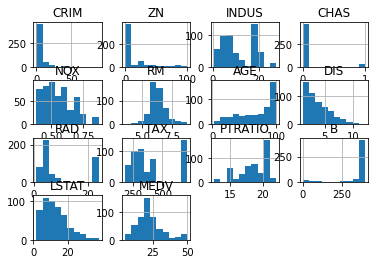

In [12]:
plt.figure(figsize=(20, 20), dpi=80)
housedata.hist()
plt.show()

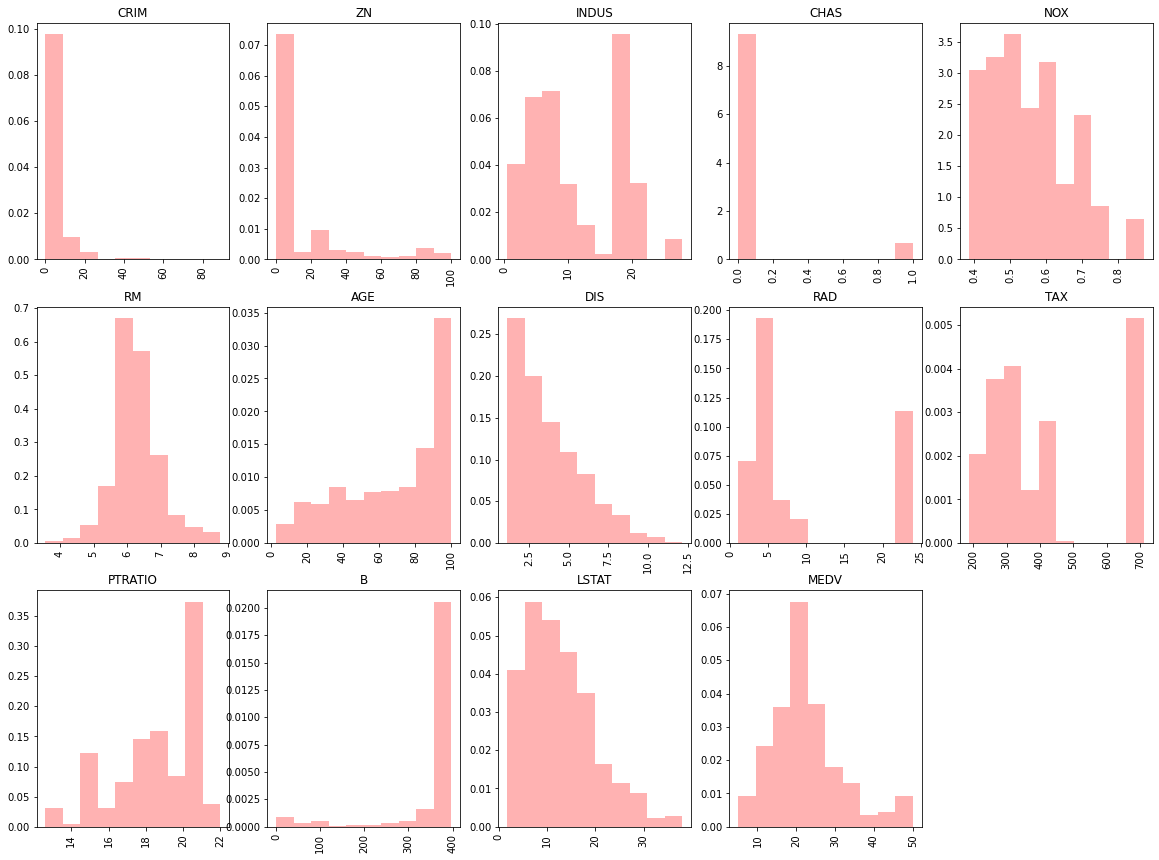

In [15]:
plt.figure(figsize=(20,20))
for i, col in enumerate(housedata.columns):
    plt.subplot(4,5,i+1)
    plt.hist(housedata[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

> <span style="font-size:1.5em;">⚠</span> **Warning: Always question the bin sizes** of a histogram to see whether they are appropriate for the plot being presented. If you see a histogram with illogically large or small bin sizes and/or uneven bin sizes beware of the results being presented!

<span style="font-size:1.5em;">�</span> What observations did you make?



> <span style="font-size:1em;">✔</span> **Observations:** 
> - Attribute CHAS is a categorical variable. Most data instances are from class 0 and only a few instances are from class 1. 
> - Many attributes are heavily skewed. e.g. CRIM, ZN, DIS, AGE, B ...
> - Attributes RAD and TAX has values that are far from the majority values. Further investigations are needed. 
> - Target variable MEDV is distributed around 22 with some extreme values around 50.
> - ...

Box plot is another useful tool in examining the data. Lets use a box plot to observe our data.

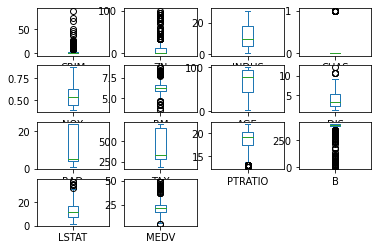

In [46]:
housedata.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

You can focus on only one variable. Lets use a box plot to observe our target variable `MEDV`.

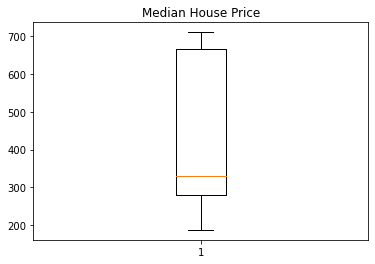

In [25]:
plt.boxplot(housedata['TAX'])
plt.title('Median House Price')
plt.show()

**How to read Box Plots:**

- The thick line in the middle of the box gives the median value.
- The top of the box shows  Quantile-.75
- The bottom of the box shows  Quantile-.25
- So the height of the box in the Inter Quantile Range (IQR)
- The top whisker —| shows  Q0.75+1.5∗IQR, the upper cutoff for outliers using Tukey’s rule
- The bottom whisker —| shows  Q0.25−1.5∗IQR, the lower cutoff for outliers using Tukey’s rule
- Any data points (circles) show outlier values

*An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.*

Are there any outliers in datahouse???

## Relationship between variable

In the previous section we observed each attribute (data column) independently. Sometimes it is also useful to observe the relationship between two variables. There are several techniques that we can use for this purpose. One of the key techniques is a scatter plot. 

Since our task is to predict MEDV (target variable) using all other attributes, let's plot the relationship between MEDV and other columns.

For this we can use matplotlib. However there is another python package called seaborn that plots nice looking figures. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. You can learn more about seaborn at [seaborn: statistical data visualization](https://seaborn.pydata.org/) 

Correlation is another important statistic when developing ML models. Lets plot the correlation matrix for the numerical data we have:

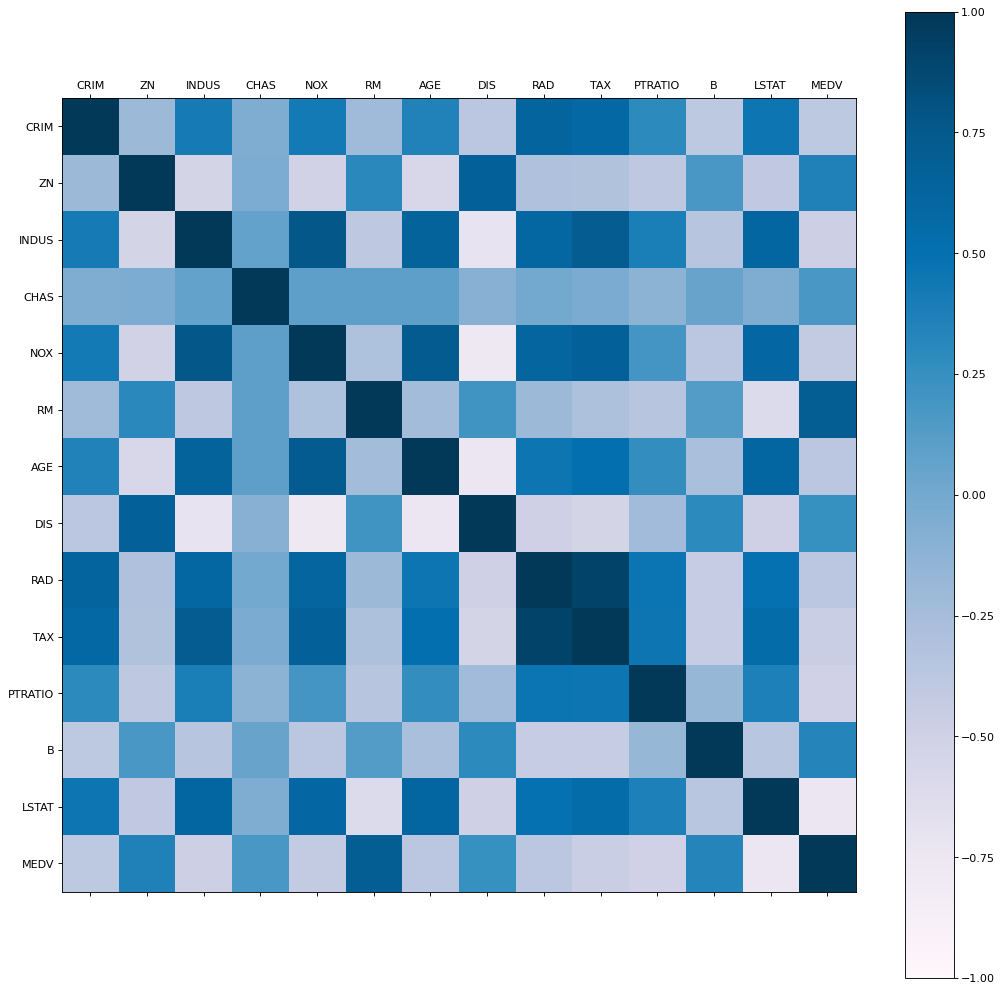

In [43]:
correlation = housedata.corr()
fig = plt.figure(figsize=(16, 16), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(housedata.columns)
ax.set_yticklabels(housedata.columns)
plt.show()

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - There seems to be a good linear relationship between MEDV and RM.
> - The relationship between MEDV and some variables appears to be nonlinier (e.g. LSAT).
> - ...

If you want to use seaborn, you can try

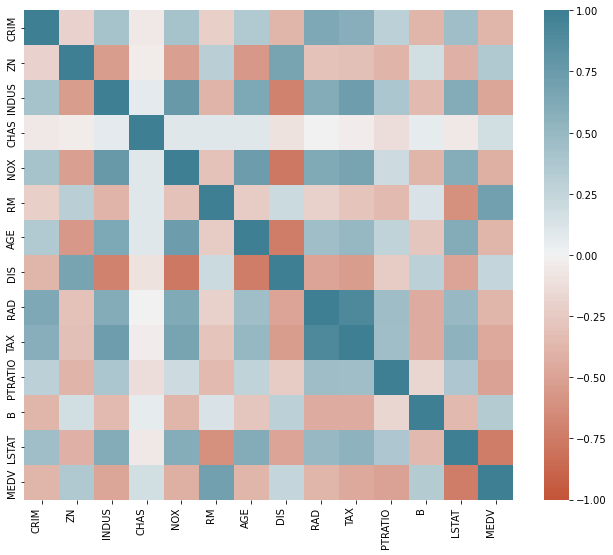

In [17]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = housedata.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

# Exercise: Analyse the Bike Share Data

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Analyse the Bike Share Data.</font>**  
> Now you seen how to do this task for the Bike Sharing (rentals) dataset. Repeat the same process for the Daily
Bike Share rental data.

> Answer the following questions and discuss this with your lab demonstrator. Please do attempt this, and don’t wait to see if solutions are released (they will not be!)
> - What is the range of some of the attributes?
> - Which of the features have a very different average to the others?
> - Which feature is skewed (hint examine the histogram)?
> - Which features are highly correlated?  

> Relate above questions back to the domain of the dataset (bike sharing) and see if you can come up with
explanations for the observed data.